<a href="https://colab.research.google.com/github/Tanulshn/Zero-to-One-Valuation/blob/main/Valuation_0_1_Stocks_Glob_function.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Objective 
To derive an alternative notation for the valuation (either PE or PB) of individual stocks to be compared with one another.



# Package Imported

For pandas, numpy and visualisation
- import pandas as pd
- import numpy as np
- import seaborn as sns
- import matplotlib.pyplot as plt
- import pylab
- %matplotlib inline
- plt.style.use('seaborn-darkgrid')

For Standardisation
- from sklearn.preprocessing import StandardScaler


In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
# For q-q plot
import scipy.stats
import pylab

plt.style.use('seaborn-darkgrid')

import glob

import warnings
warnings.simplefilter(action='ignore')

In [13]:
data_std= pd.DataFrame()

for file_name in glob.glob('/content/drive/MyDrive/Colab Notebooks/0-1: Valuation/CSV Files/'+'*.csv'):
  df = pd.read_csv(file_name)
  
  #Convert the datatype from object to float
  for i in ['Std','Con']:
    df[i] = pd.to_numeric(df[i], errors= 'coerce').round(2)

  df = df[['Date','Std']]
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=False) # Use dayfirst function carefully
  df.set_index('Date', inplace=True) # Set the Date Column to Index
  df = df.resample('m').last() # Set the frequency to Business days
  #df.fillna(method='ffill') # Fill the nan values

  # Create a string for the suffix 
  name= file_name.split('/')[-1]
  suffix = name.split('.')[0]
  df = df.add_suffix(f'_{suffix}')

  # Join the Time series along the column
  data_std= data_std.join(df, how='outer')


In [14]:
data_con= pd.DataFrame()

for file_name in glob.glob('/content/drive/MyDrive/Colab Notebooks/0-1: Valuation/CSV Files/'+'*.csv'):
  df = pd.read_csv(file_name)
  
  #Convert the datatype from object to float
  for i in ['Std','Con']:
    df[i] = pd.to_numeric(df[i], errors= 'coerce').round(2)

  df = df[['Date','Con']]
  df['Date'] = pd.to_datetime(df['Date'], dayfirst=False) # Use dayfirst function carefully
  df.set_index('Date', inplace=True) # Set the Date Column to Index
  df = df.resample('m').last() # Set the frequency to Business days
  #df.fillna(method='ffill') # Fill the nan values

  # Create a string for the suffix 
  name= file_name.split('/')[-1]
  suffix = name.split('.')[0]
  df = df.add_suffix(f'_{suffix}')

  # Join the Time series along the column
  data_con= data_con.join(df, how='outer')

In [17]:
data_std.head(20)

,Std_Grasim ind,Std_Bank of Baroda,Std_Exide Ind,Std_Adani Ports,Std_Dr Reddys,Std_Jindal Steel,Std_IOC,Std_HDFC Bank,Std_Bajaj Auto,Std_Divis,Std_Havells,Std_Dabur,Std_CCIL,Std_Axis,Std_Bank of India,Std_Colgate Palmolive,Std_HUL,Std_Adani Power,Std_Asian Paints,Std_Canara Bank,Std_GodrejConsumer,Std_ICICI,Std_Kotak bank,Std_Hindalco,Std_Oil India,Std_L&T,Std_Pidilite,Std_TATA Steel,Std_NALCO,Std_United Spirits,Std_Wipro,Std_Bajaj Finserv,Std_Vedanta,Std_Britannia,Std_Bosch,Std_Cipla,Std_GSK Pharma,Std_HCL Tech,Std_Cmmins,Std_HPCL,Std_BergerPaint,Std_Hero Motors,Std_Infosys,Std_ITC,Std_JSW Steel,Std_M&M,Std_Maruti,Std_Jubilant,Std_Mindtree,Std_Marico,Std_MRF,Std_ONGC,Std_PageInd,Std_PNB,Std_Sun Pharma,Std_Shree Cement,Std_Reliance Industries,Std_SBI Bank,Std_TATA Power,Std_Ultratech,Std_TATA GloBev,Std_TechM,Std_TCS,Std_TATA Motors,Std_Titan
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-02-28,13.35,1.42,18.23,40.91,25.75,45.74,6.83,3.72,20.20,25.34,14.78,35.15,19.74,2.89,1.34,24.25,25.61,NaN,25.16,1.28,31.59,1.86,6.09,20.47,12.37,23.45,16.54,11.73,47.33,19.74,22.09,4.06,19.57,22.69,24.48,23.96,28.69,27.50,20.36,2.08,17.19,17.44,25.11,23.01,14.78,15.06,20.24,55.41,13.43,34.74,5.84,15.73,25.64,1.79,29.88,7.59,21.13,1.92,27.09,11.03,15.80,14.87,28.21,15.27,37.03
2010-03-31,12.34,1.54,19.50,45.13,25.44,44.25,7.03,4.11,17.11,26.04,15.75,31.79,21.78,2.95,1.40,21.70,24.86,148.06,25.25,1.34,32.46,2.06,5.81,18.10,10.64,23.16,20.17,11.11,32.24,21.78,21.19,3.97,18.46,32.79,20.18,25.12,27.86,23.95,22.90,8.29,16.94,17.40,26.08,24.73,11.42,15.00,16.40,60.52,11.31,28.27,6.57,14.02,22.70,1.97,41.30,12.17,21.64,2.00,34.72,13.15,15.46,14.05,27.19,17.13,32.64
2010-04-30,11.96,1.67,19.43,42.24,25.14,46.80,7.00,4.24,17.78,25.86,16.17,36.10,21.42,3.21,1.56,23.84,24.88,159.80,25.75,1.40,36.03,2.05,5.73,17.83,10.29,22.96,20.66,10.88,32.30,21.42,20.13,4.09,17.38,33.93,20.55,25.48,29.97,26.39,25.54,8.21,17.38,17.14,27.30,25.00,11.35,14.58,14.80,65.96,10.92,27.87,6.86,13.46,23.15,2.02,36.21,11.18,20.82,2.21,34.33,11.08,16.63,12.82,26.66,19.73,37.76
2010-05-31,7.99,1.71,18.87,39.81,28.01,41.18,8.39,4.02,18.76,28.54,14.99,37.12,21.27,3.12,1.35,24.34,24.61,155.21,25.84,1.33,40.36,1.87,5.88,15.01,11.65,23.21,19.56,8.80,32.90,21.27,20.09,5.24,15.50,35.04,20.68,23.68,33.03,25.60,25.08,9.46,19.72,17.33,26.50,26.63,10.25,15.87,14.31,54.49,10.47,27.82,7.10,14.90,22.97,1.94,38.35,10.18,21.06,2.18,32.49,10.50,17.12,10.58,25.88,17.07,39.40
2010-06-30,11.56,1.60,19.31,39.90,28.44,36.11,31.08,3.94,17.99,27.51,16.27,41.39,22.75,3.02,1.35,25.73,27.28,97.07,27.22,1.36,35.44,1.83,5.75,14.04,14.62,32.99,21.28,7.38,28.22,22.75,19.58,5.12,11.08,43.51,22.04,24.76,34.39,23.39,23.92,0.00,20.52,18.40,27.99,27.42,9.77,16.13,17.29,43.50,11.44,32.69,8.79,18.13,24.19,1.91,33.62,14.44,20.46,2.12,37.38,11.92,19.54,12.37,24.92,18.58,36.84
2010-07-31,11.60,1.72,21.29,39.13,26.55,35.99,27.91,4.38,19.44,26.67,17.09,38.91,23.16,3.27,1.59,25.91,25.64,97.30,30.79,1.45,37.12,1.92,5.75,15.58,14.29,32.82,22.13,8.30,27.98,23.16,21.00,5.06,11.35,46.12,23.20,23.87,31.66,25.20,25.48,0.00,20.91,16.30,27.97,27.78,10.28,17.01,14.55,50.05,11.09,31.50,8.32,17.03,28.93,1.95,33.31,12.73,18.96,2.31,37.74,11.71,18.66,11.81,27.87,20.20,43.62
2010-08-31,12.79,1.84,21.63,41.53,26.75,39.56,31.70,4.40,19.76,26.54,21.30,41.19,21.98,3.22,1.72,25.37,26.97,103.91,32.67,1.55,40.06,2.13,5.02,16.17,14.75,33.17,23.51,8.08,26.37,21.98,20.40,5.62,9.98,48.03,24.52,22.18,29.30,24.60,29.53,0.00,24.37,16.09,27.22,29.39,10.41,16.13,15.27,69.86,10.44,31.95,8.62,18.36,32.24,2.15,33.19,13.29,17.26,2.55,34.92,26.93,19.37,10.80,28.00,24.11,45.57
2010-09-30,19.30,1.88,21.62,43.15,27.52,36.93,12.40,4.83,18.66,25.53,21.18,42.36,21.84,3.54,1.91,26.15,29.61,71.05,33.93,1.64,38.60,2.37,5.52,18.31,14.08,36.30,25.25,8.40,24.80,21.84,23.20,6.13,9.56,69.98,24.06,23.85,33.75,30.09,25.36,17.27,28.70,17.40,29.55,30.49,12.31,17.40,17.29,54.87,12.25,31.44,10.49,18.91,28.02,2.22,33.68,34.75,17.47,2.84,35.76,37.18,47.

### Data PreProcessing 

In [33]:
df_std = df_std[:-1] # Since the data is till 21 June only, Lets remove the last month and keep it til May 2021
df_std.shape

(136, 65)

In [34]:
# Check for null values
df_std.isnull().sum()

Std_Grasim ind        0
Std_Bank of Baroda    0
Std_Exide Ind         0
Std_Adani Ports       0
Std_Dr Reddys         0
                     ..
Std_TATA GloBev       0
Std_TechM             0
Std_TCS               0
Std_TATA Motors       0
Std_Titan             0
Length: 65, dtype: int64

The dataframes are ready to be used for further procesing
# Variable transformation

## For Standalone variables

In [20]:
  # Import packages
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [54]:
# Create a function for transformation
def scale(series, monthly=False):
  """ Returns a Standardised series based on the Standard scale
  Monthly - Whether to perform on monthly data or daily data
  """

  if monthly:
    if len(series)>84:
      #print('No of months available is {}. Hence, the scale function can be applied.'.format(len(series)))
      sc.fit(series[-84:])
      scaled_values = sc.transform(series)
    else:
      print('No of months available is {}. The scale function can not be applied.'.format(len(series)))

    series_fit = sc.fit(series)[-84:] # no of months in 7 years
    scaled_values = sc.transform(series)
 
  else:
    if len(series)>1750:
        print('No of days available is {}. Hence, the scale function can be applied.'.format(len(series)))
        sc.fit(series[-60:])
        scaled_values = sc.transform(series)
    else:
      print('No of days available is {}. The scale function can not be applied.'.format(len(series)))

    series_fit = sc.fit (series)[-1500:] # no of days in 7 years
    scaled_values = sc.transform(series)
  
  return scaled_values


### Scaled Valuations: As of today

In [55]:
Scaled_std_2021 = df_std.copy()

for i in (['Std_Grasim ind', 'Std_Bank of Baroda', 'Std_Exide Ind',
       'Std_Adani Ports', 'Std_Dr Reddys', 'Std_Jindal Steel', 'Std_IOC',
       'Std_HDFC Bank', 'Std_Bajaj Auto', 'Std_Divis', 'Std_Havells',
       'Std_Dabur', 'Std_CCIL', 'Std_Axis', 'Std_Bank of India',
       'Std_Colgate Palmolive', 'Std_HUL', 'Std_Adani Power',
       'Std_Asian Paints', 'Std_Canara Bank', 'Std_GodrejConsumer',
       'Std_ICICI', 'Std_Kotak bank', 'Std_Hindalco', 'Std_Oil India',
       'Std_L&T', 'Std_Pidilite', 'Std_TATA Steel', 'Std_NALCO',
       'Std_United Spirits', 'Std_Wipro', 'Std_Bajaj Finserv', 'Std_Vedanta',
       'Std_Britannia', 'Std_Bosch', 'Std_Cipla', 'Std_GSK Pharma',
       'Std_HCL Tech', 'Std_Cmmins', 'Std_HPCL', 'Std_BergerPaint',
       'Std_Hero Motors', 'Std_Infosys', 'Std_ITC', 'Std_JSW Steel', 'Std_M&M',
       'Std_Maruti', 'Std_Jubilant', 'Std_Mindtree', 'Std_Marico', 'Std_MRF',
       'Std_ONGC', 'Std_PageInd', 'Std_PNB', 'Std_Sun Pharma',
       'Std_Shree Cement', 'Std_Reliance Industries', 'Std_SBI Bank',
       'Std_TATA Power', 'Std_Ultratech', 'Std_TATA GloBev', 'Std_TechM',
       'Std_TCS', 'Std_TATA Motors', 'Std_Titan']):
  
  Scaled_std_2021[i] = scale(df_std[[i]],monthly = True).round(3)

Scaled_std_2021.tail()
  

,Std_Grasim ind,Std_Bank of Baroda,Std_Exide Ind,Std_Adani Ports,Std_Dr Reddys,Std_Jindal Steel,Std_IOC,Std_HDFC Bank,Std_Bajaj Auto,Std_Divis,Std_Havells,Std_Dabur,Std_CCIL,Std_Axis,Std_Bank of India,Std_Colgate Palmolive,Std_HUL,Std_Adani Power,Std_Asian Paints,Std_Canara Bank,Std_GodrejConsumer,Std_ICICI,Std_Kotak bank,Std_Hindalco,Std_Oil India,Std_L&T,Std_Pidilite,Std_TATA Steel,Std_NALCO,Std_United Spirits,Std_Wipro,Std_Bajaj Finserv,Std_Vedanta,Std_Britannia,Std_Bosch,Std_Cipla,Std_GSK Pharma,Std_HCL Tech,Std_Cmmins,Std_HPCL,Std_BergerPaint,Std_Hero Motors,Std_Infosys,Std_ITC,Std_JSW Steel,Std_M&M,Std_Maruti,Std_Jubilant,Std_Mindtree,Std_Marico,Std_MRF,Std_ONGC,Std_PageInd,Std_PNB,Std_Sun Pharma,Std_Shree Cement,Std_Reliance Industries,Std_SBI Bank,Std_TATA Power,Std_Ultratech,Std_TATA GloBev,Std_TechM,Std_TCS,Std_TATA Motors,Std_Titan
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2021-01-31,0.518,-1.366,0.279,1.781,-0.135,-0.432,-0.119,-0.552,2.030,2.172,2.098,1.370,0.183,-0.400,-0.800,0.892,1.664,NaN,2.092,-0.866,0.587,1.563,-0.116,1.509,-1.142,3.431,2.163,0.111,1.647,0.183,2.031,1.592,-0.675,0.029,6.461,-0.462,-0.251,0.622,1.034,-0.510,2.014,1.611,1.975,-1.814,0.944,-0.507,2.377,3.247,1.570,0.935,0.908,0.861,2.337,-1.091,-0.289,-0.183,2.782,-0.772,0.020,-0.635,2.785,0.830,2.793,-0.523,3.711
2021-02-28,0.678,-1.058,0.564,3.181,-0.253,-0.347,-0.064,0.331,1.629,2.162,2.353,1.235,0.660,-0.029,-0.066,0.805,1.394,NaN,1.797,-0.644,0.282,2.314,0.160,3.081,-0.842,3.873,2.206,0.422,0.256,0.660,1.884,1.901,-0.675,-0.106,6.240,-0.583,-0.255,0.594,1.985,-0.445,1.855,1.540,2.052,-1.802,1.147,-0.507,2.132,4.049,1.445,0.721,0.922,5.639,2.494,-0.895,-0.285,0.151,3.408,0.157,0.391,-0.356,3.215,0.621,2.184,-0.523,3.660
2021-03-31,0.800,-1.186,-0.598,3.949,0.071,-0.511,-0.819,-0.309,1.345,2.292,1.591,1.477,2.079,-0.322,-0.407,0.068,1.616,NaN,1.694,-0.672,0.477,1.863,-0.166,2.129,-0.802,3.013,2.009,-0.456,0.087,2.079,1.270,1.742,-0.390,0.207,0.408,-0.298,0.081,2.411,2.233,-0.675,2.421,0.296,2.503,-1.525,0.164,6.689,2.274,1.829,2.206,0.792,1.623,5.098,1.577,-0.960,-0.163,0.211,2.481,-0.109,0.252,0.369,3.377,1.239,2.996,-0.523,3.070
2021-04-30,0.752,-1.315,-0.755,4.237,0.543,-0.448,-0.823,-0.795,1.662,2.962,1.369,1.449,2.031,-0.224,-0.433,-0.202,1.470,NaN,1.692,-0.811,0.280,2.114,-0.191,2.559,-0.819,2.734,2.025,-0.163,0.346,2.031,2.677,2.174,-0.354,0.031,0.362,0.024,0.098,1.792,1.660,-0.685,2.057,0.099,2.431,-1.824,1.143,6.302,1.975,1.804,2.259,0.794,1.557,5.465,1.491,-1.004,-0.122,0.083,2.463,-0.197,0.182,0.172,3.638,1.078,2.596,-0.523,2.866
2021-05-31,0.821,-1.058,-0.384,4.602,0.649,-0.470,-0.746,-0.155,2.356,3.162,1.518,1.478,2.589,-0.009,-0.197,0.631,1.444,NaN,2.571,-0.617,1.134,2.840,0.047,2.900,-0.600,3.188,2.692,-0.043,0.571,2.589,3.504,2.412,-0.333,0.031,0.501,0.157,0.154,2.135,1.306,-0.591,2.662,0.490,2.637,-1.561,1.115,6.804,2.442,2.084,2.974,1.533,1.682,5.801,1.622,-0.765,-0.112,0.056,2.829,0.400,0.303,0.357,3.590,1.396,2.944,-0.523,3.188


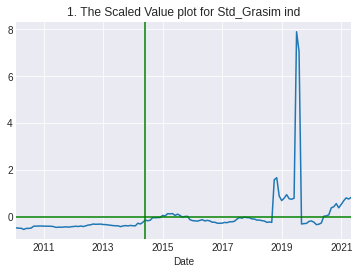

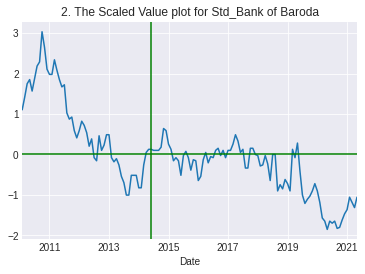

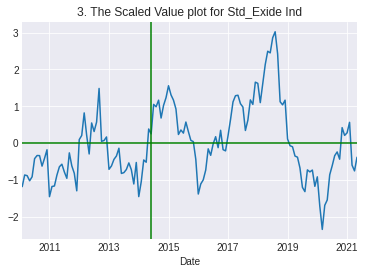

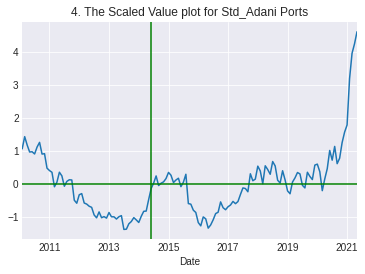

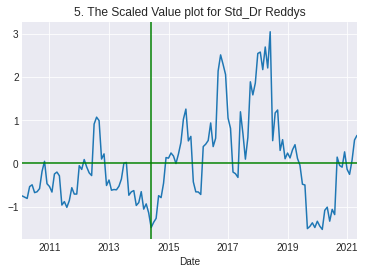

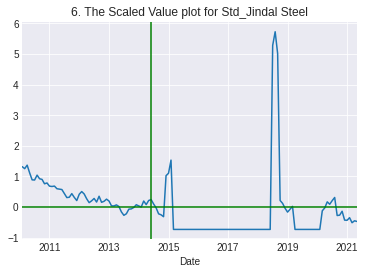

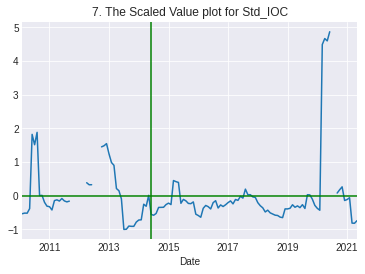

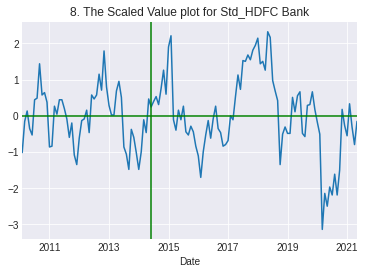

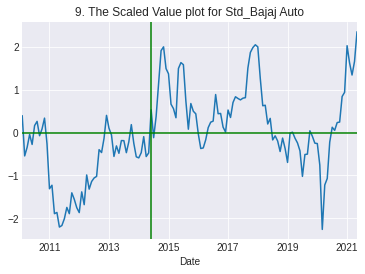

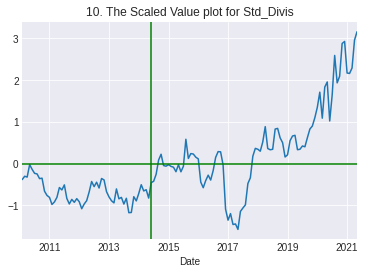

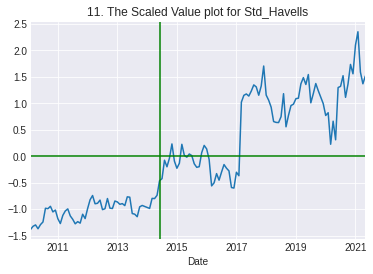

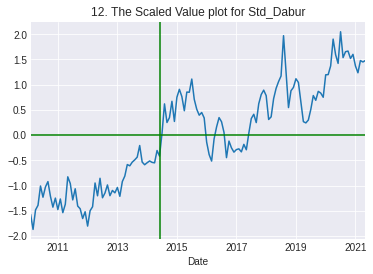

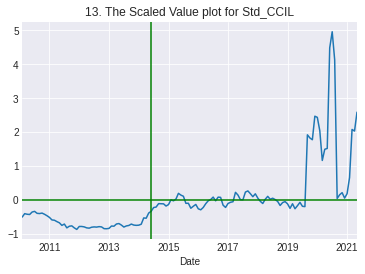

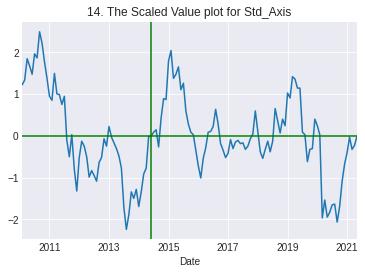

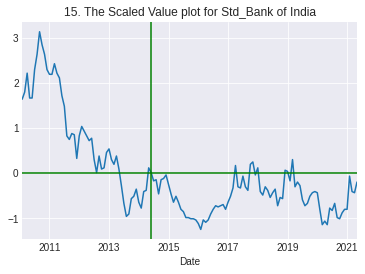

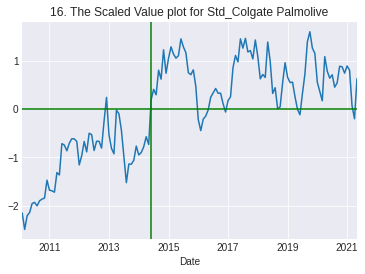

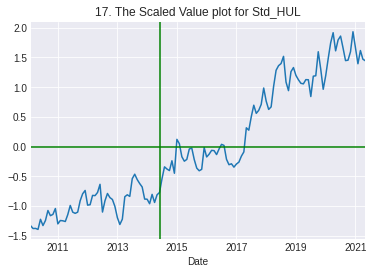

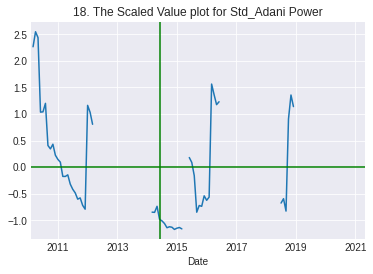

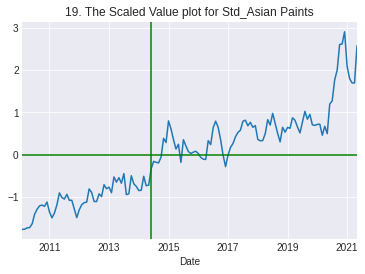

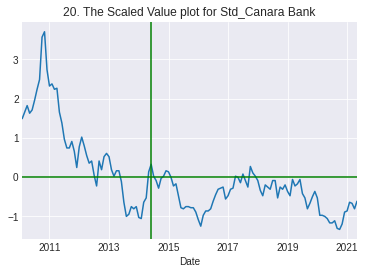

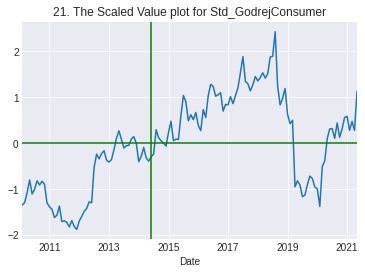

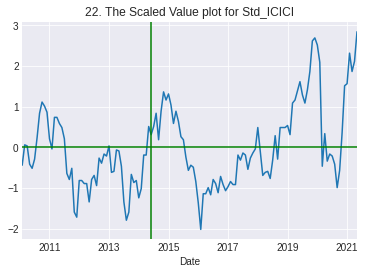

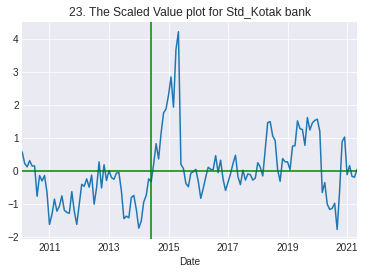

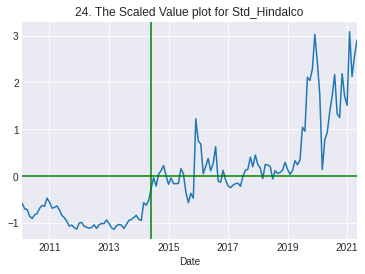

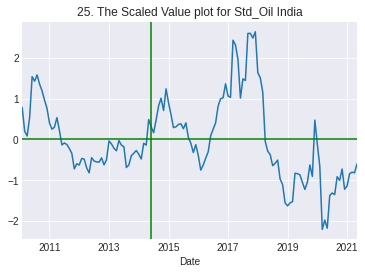

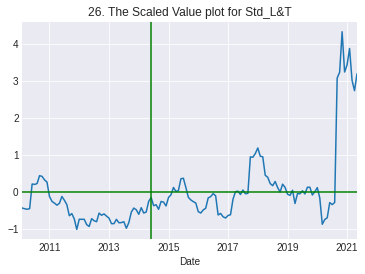

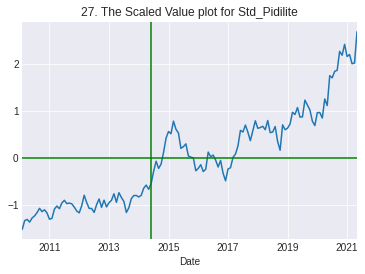

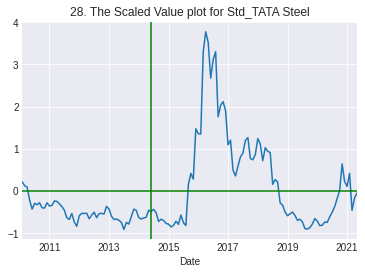

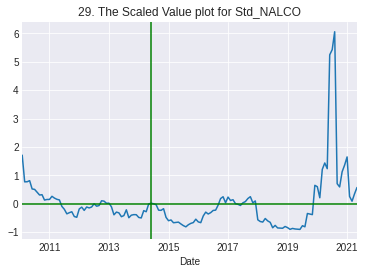

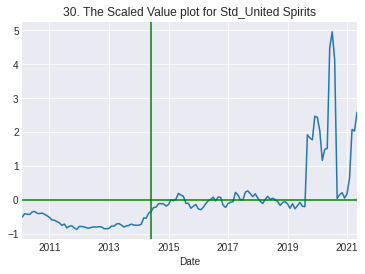

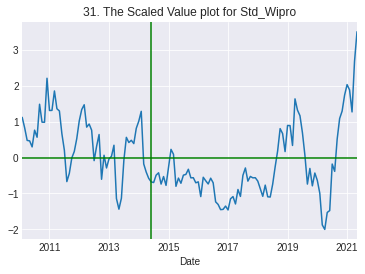

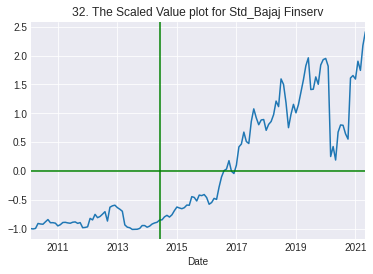

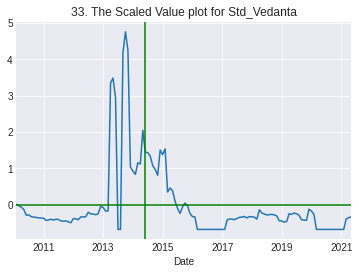

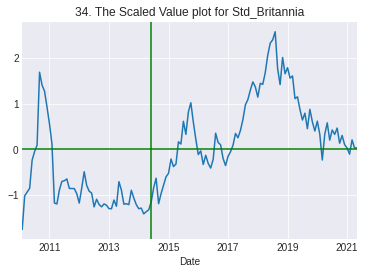

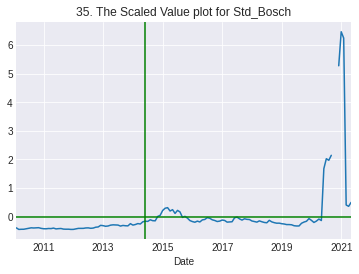

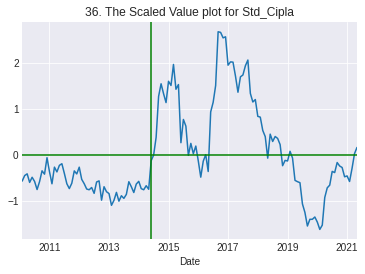

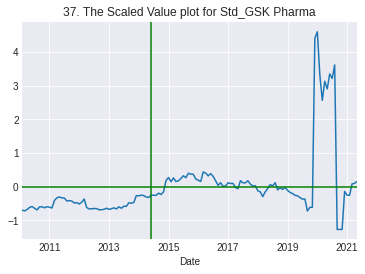

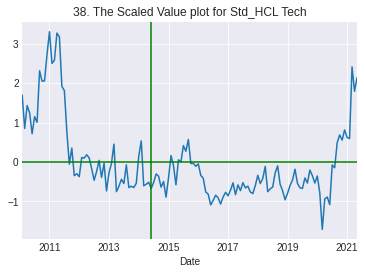

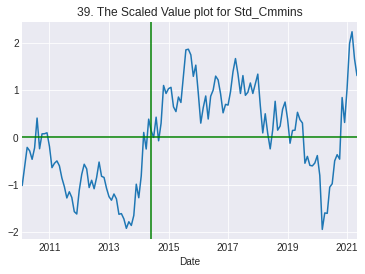

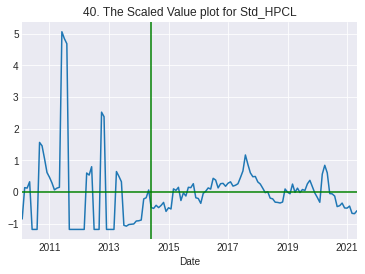

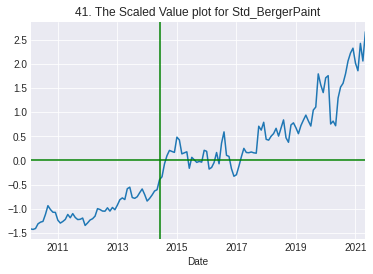

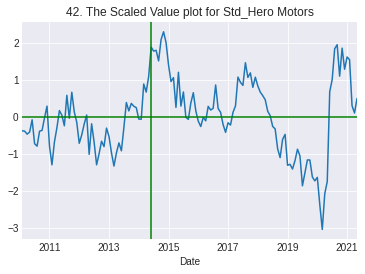

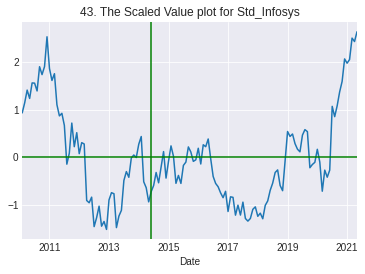

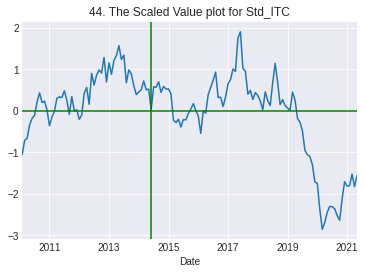

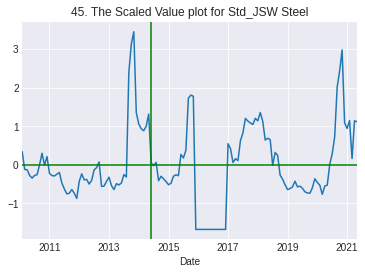

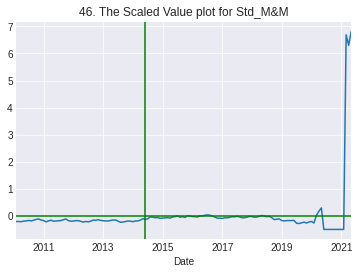

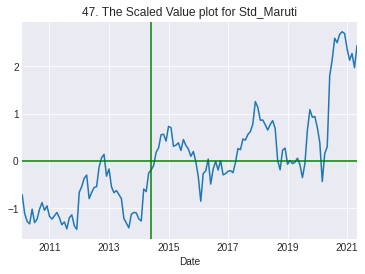

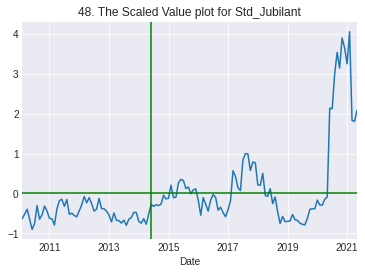

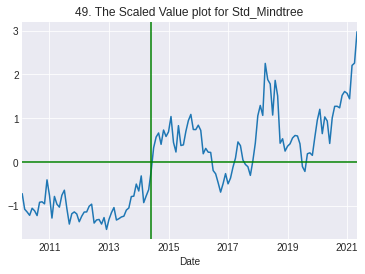

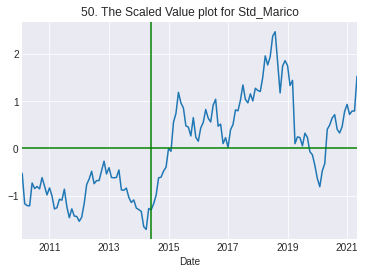

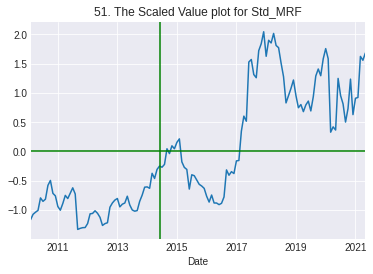

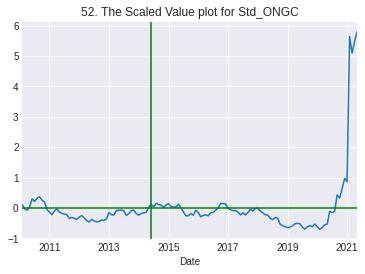

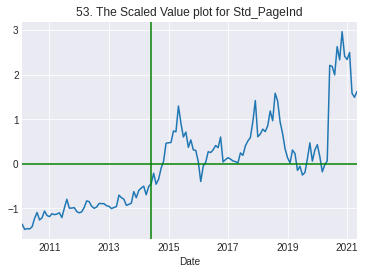

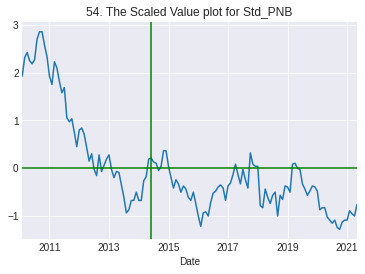

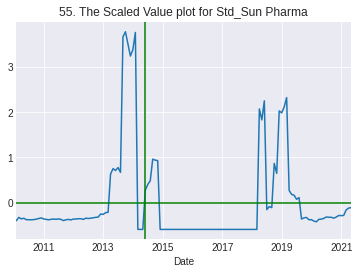

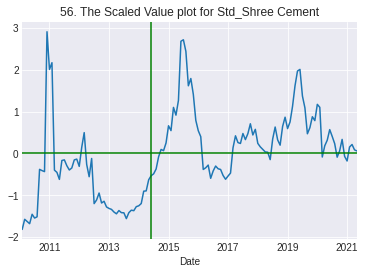

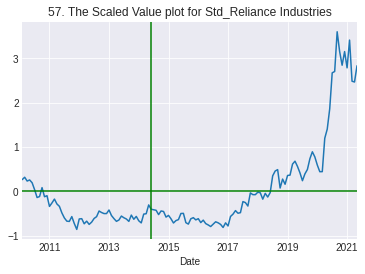

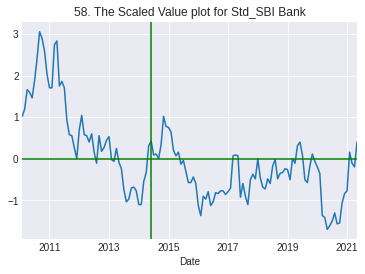

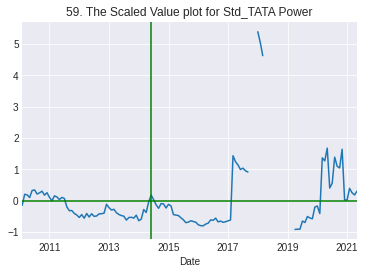

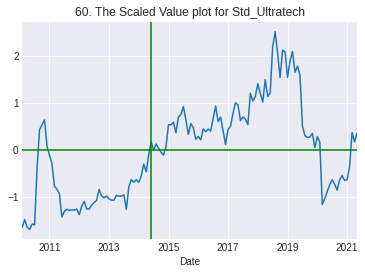

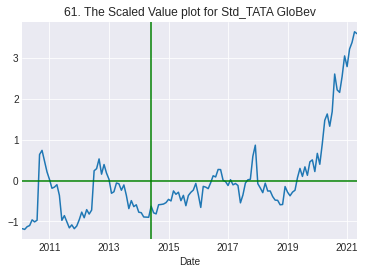

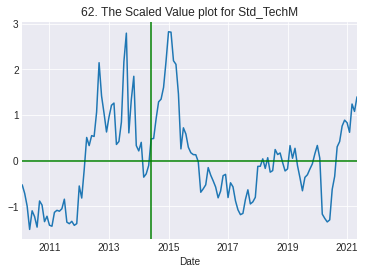

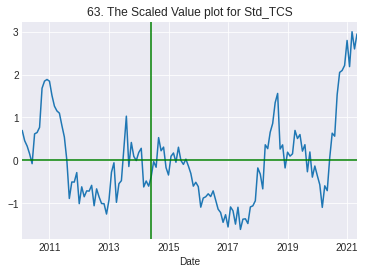

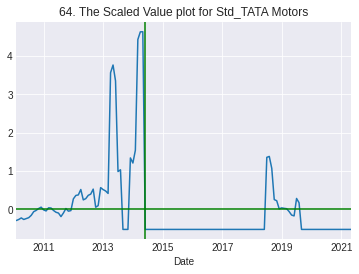

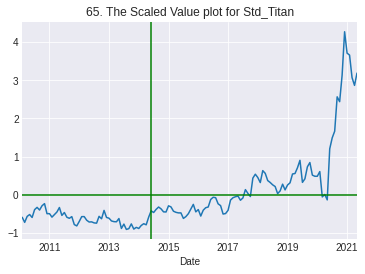

In [56]:
# Create Visualisation

for col,i in enumerate(['Std_Grasim ind', 'Std_Bank of Baroda', 'Std_Exide Ind',
       'Std_Adani Ports', 'Std_Dr Reddys', 'Std_Jindal Steel', 'Std_IOC',
       'Std_HDFC Bank', 'Std_Bajaj Auto', 'Std_Divis', 'Std_Havells',
       'Std_Dabur', 'Std_CCIL', 'Std_Axis', 'Std_Bank of India',
       'Std_Colgate Palmolive', 'Std_HUL', 'Std_Adani Power',
       'Std_Asian Paints', 'Std_Canara Bank', 'Std_GodrejConsumer',
       'Std_ICICI', 'Std_Kotak bank', 'Std_Hindalco', 'Std_Oil India',
       'Std_L&T', 'Std_Pidilite', 'Std_TATA Steel', 'Std_NALCO',
       'Std_United Spirits', 'Std_Wipro', 'Std_Bajaj Finserv', 'Std_Vedanta',
       'Std_Britannia', 'Std_Bosch', 'Std_Cipla', 'Std_GSK Pharma',
       'Std_HCL Tech', 'Std_Cmmins', 'Std_HPCL', 'Std_BergerPaint',
       'Std_Hero Motors', 'Std_Infosys', 'Std_ITC', 'Std_JSW Steel', 'Std_M&M',
       'Std_Maruti', 'Std_Jubilant', 'Std_Mindtree', 'Std_Marico', 'Std_MRF',
       'Std_ONGC', 'Std_PageInd', 'Std_PNB', 'Std_Sun Pharma',
       'Std_Shree Cement', 'Std_Reliance Industries', 'Std_SBI Bank',
       'Std_TATA Power', 'Std_Ultratech', 'Std_TATA GloBev', 'Std_TechM',
       'Std_TCS', 'Std_TATA Motors', 'Std_Titan']):
  plt.figure(i)
  Scaled_std_2021[i].plot()
  plt.axvline(x = Scaled_std_2021.index[-84], color='g')
  plt.axhline(y =0, color='g')
  plt.title('{}. The Scaled Value plot for {}'.format(col+1, i))
  plt.show()

In [57]:
# Define a function to plot visualistion for the Scaled values

def scale_plot(df):
  print('The Valuation of The stock is:', df['Value'][-1],' and the scaled value is: ',df['S_value'][-1])

  print('\n')
  plt.figure(figsize=(15,8))
  plt.subplot(1,2,1)
  sns.distplot(df['Value'], bins=50)
  plt.axvline(x = df['Value'][-1], color='b')
  print('The normalised distribution of the Values')

  plt.subplot(1,2,2)
  sns.distplot(df['S_value'], bins=50)
  plt.axvline(x = df['S_value'][-1], color='b')
  print('The normalised distribution of the Scaled Values')

The Valuation of The stock is: 4.07  and the scaled value is:  -0.189


The normalised distribution of the Values
The normalised distribution of the Scaled Values


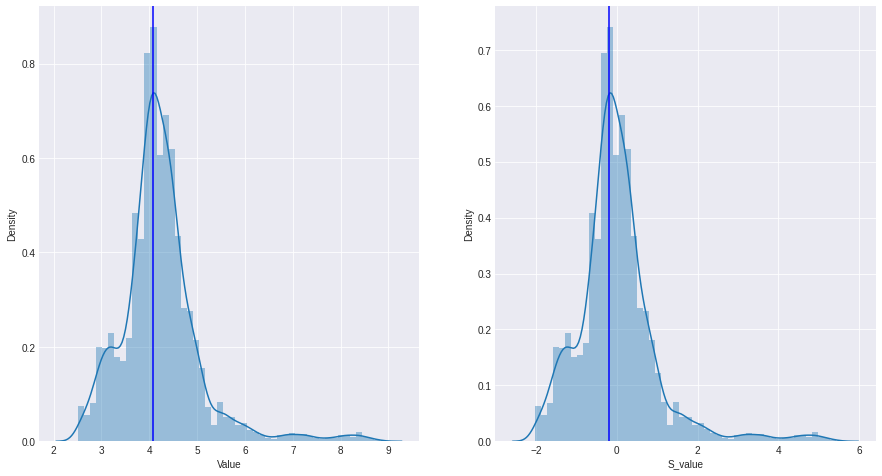

In [ ]:
scale_plot(df_b)

The Valuation of The stock is: 4.07  and the scaled value is:  -0.177


The normalised distribution of the Values
The normalised distribution of the Scaled Values


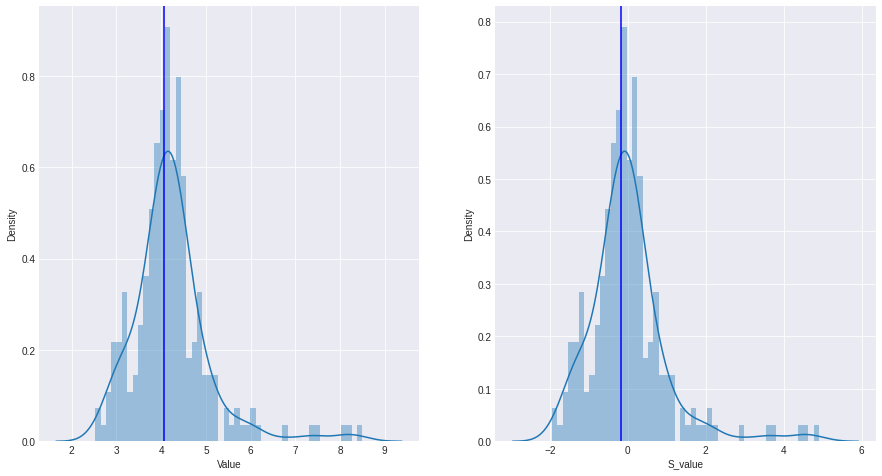

In [ ]:
scale_plot(df_m)

### As per custom month
Custom Selection for deriving Valuation equivalence at a certain point.

- Pass a snippet of the main series as arguement. (Starting from the beginning and ending at a dersired month/date)
- pass scale to determine if the past 7 years data can be figured out or not
- Save the output as a seperate dataframe. and join it with the original df with timestamp as reference.
 

Although I am creating these functions for manual operation, we will have to consider automating the same in the future.

In [ ]:
# Pass the end date for reference (format yyyy-mm)
V_2018 = scale(df_m[['Value']][:'2018-12'], monthly=True).round(3)
V_2018 = pd.DataFrame(V_2018, index = df_m[['Value']][:'2018-12'].index , columns= ['Scaled_2018'])
V_2018.tail()


No of months available is 201. Hence, the scale function can be applied.


,Scaled_2018
Date,
2018-08-31,0.240
2018-09-30,0.107
2018-10-31,-0.775
2018-11-30,-0.356
2018-12-31,-0.257


In [ ]:
V_2019 = scale(df_m[['Value']][:'2019-12'], monthly=True).round(3)
V_2019 = pd.DataFrame(V_2019, index = df_m[['Value']][:'2019-12'].index , columns= ['Scaled_2019'])
V_2019.tail()

No of months available is 213. Hence, the scale function can be applied.


,Scaled_2019
Date,
2019-08-31,-0.397
2019-09-30,0.045
2019-10-31,0.057
2019-11-30,0.238
2019-12-31,-0.011


In [ ]:
V_2020 = scale(df_m[['Value']][:'2020-12'], monthly=True).round(3)
V_2020 = pd.DataFrame(V_2020, index = df_m[['Value']][:'2020-12'].index , columns= ['Scaled_2020'])
V_2020.tail()

No of months available is 225. Hence, the scale function can be applied.


,Scaled_2020
Date,
2020-08-31,-0.883
2020-09-30,-1.178
2020-10-31,-0.827
2020-11-30,0.035
2020-12-31,-0.192


In [ ]:
V_2014 = scale(df_m[['Value']][:'2014-12'], monthly=True).round(3)
V_2014 = pd.DataFrame(V_2014, index = df_m[['Value']][:'2014-12'].index , columns= ['Scaled_2014'])
V_2014.tail()

No of months available is 153. Hence, the scale function can be applied.


,Scaled_2014
Date,
2014-08-31,0.166
2014-09-30,0.067
2014-10-31,0.266
2014-11-30,0.496
2014-12-31,0.196


In [ ]:
V_2010 = scale(df_m[['Value']][:'2010-12'], monthly=True).round(3)
V_2010 = pd.DataFrame(V_2010, index = df_m[['Value']][:'2010-12'].index , columns= ['Scaled_2010'])
V_2010.tail()

No of months available is 105. Hence, the scale function can be applied.


,Scaled_2010
Date,
2010-08-31,0.095
2010-09-30,0.458
2010-10-31,0.129
2010-11-30,0.154
2010-12-31,0.053


In [ ]:
V_2008 = scale(df_m[['Value']][:'2008-12'], monthly=True).round(3)
V_2008 = pd.DataFrame(V_2008, index = df_m[['Value']][:'2008-12'].index , columns= ['Scaled_2008'])
V_2008.tail()

No of months available is 81. The scale function can not be applied.


,Scaled_2008
Date,
2008-08-31,0.099
2008-09-30,-0.169
2008-10-31,-0.706
2008-11-30,-0.966
2008-12-31,-0.890


In [ ]:
V_2017 = scale(df_m[['Value']][:'2017-12'], monthly=True).round(3)
V_2017 = pd.DataFrame(V_2017, index = df_m[['Value']][:'2017-12'].index , columns= ['Scaled_2017'])
V_2017.tail()

No of months available is 189. Hence, the scale function can be applied.


,Scaled_2017
Date,
2017-08-31,0.658
2017-09-30,0.745
2017-10-31,0.680
2017-11-30,0.810
2017-12-31,0.875


In [ ]:
df_M_combined = df_m.join(V_2010, how= 'outer').join(V_2014, how= 'outer').join(V_2017, how= 'outer').join(V_2018, how= 'outer').join(V_2019, how= 'outer').join(V_2020, how= 'outer')

In [ ]:
df_M_combined.tail(50)

,Value,Mcap,S_value,Scaled_2010,Scaled_2014,Scaled_2017,Scaled_2018,Scaled_2019,Scaled_2020
Date,,,,,,,,,
2017-05-31,4.69,419577.94,0.534,NaN,NaN,0.474,0.460,0.476,0.523
2017-06-30,4.51,425269.87,0.328,NaN,NaN,0.279,0.262,0.272,0.319
2017-07-31,4.87,459238.11,0.741,NaN,NaN,0.669,0.659,0.680,0.727
2017-08-31,4.86,458197.24,0.730,NaN,NaN,0.658,0.648,0.669,0.715
2017-09-30,4.94,465907.51,0.821,NaN,NaN,0.745,0.736,0.759,0.806
2017-10-31,4.88,467765.27,0.753,NaN,NaN,0.680,0.670,0.691,0.738
2017-11-30,5.00,479322.41,0.890,NaN,NaN,0.810,0.802,0.827,0.874
2017-12-31,5.06,485272.61,0.959,NaN,NaN,0.875,0.868,0.895,0.942
2018-01-31,5.15,520059.00,1.062,NaN,NaN,NaN,0.968,0.998,1.044


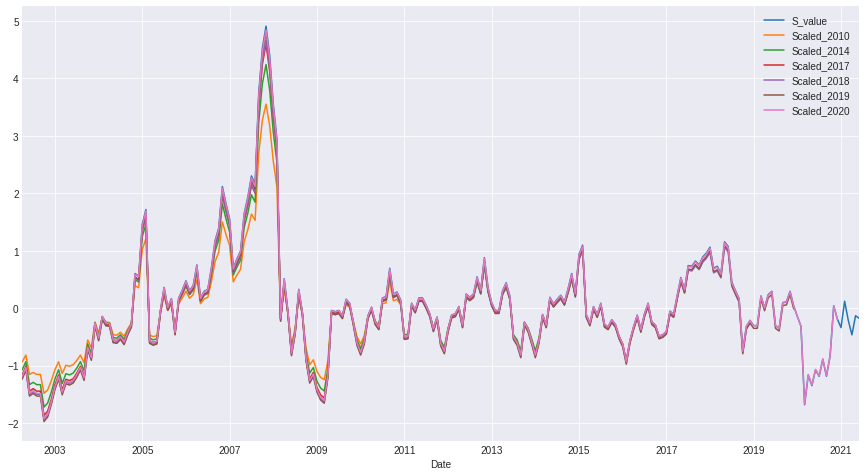

In [ ]:
plt.figure(figsize=(15,8))
df_M_combined['S_value'].plot()
df_M_combined['Scaled_2010'].plot()
df_M_combined['Scaled_2014'].plot()
df_M_combined['Scaled_2017'].plot()
df_M_combined['Scaled_2018'].plot()
df_M_combined['Scaled_2019'].plot()
df_M_combined['Scaled_2020'].plot()

plt.legend()
plt.show()


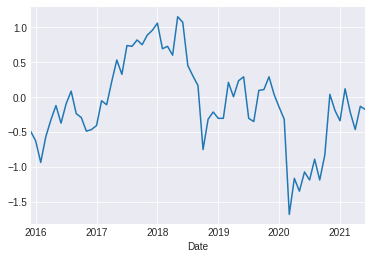

In [ ]:
df_M_combined['S_value']['2015-12':].plot()
#df_M_combined['Scaled_2014'].plot()

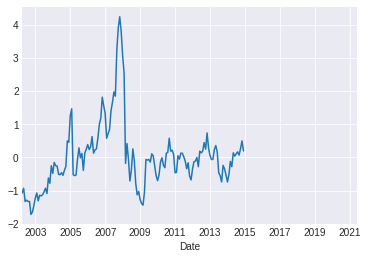

In [ ]:
df_M_combined['Scaled_2014'].plot()

## Include correlation with MCap too.


In [ ]:
df_m

,Value,Mcap,S_value
Date,,,
2002-04-30,3.18,6171.95,-1.199
2002-05-31,3.32,6456.14,-1.038
2002-06-30,2.92,5672.51,-1.497
2002-07-31,2.96,5990.90,-1.451
2002-08-31,2.92,5907.78,-1.497
...,...,...,...
2021-02-28,4.33,845552.53,0.121
2021-03-31,4.04,823360.73,-0.212
2021-04-30,3.82,778850.97,-0.464


In [ ]:
# Given by Lavi; glob- reading all the csv in a given folder.

# import glob
# import pandas as pd

# glued_data = pd.DataFrame()
# for file_name in glob.glob(directoryPath+'*.csv'):
#     x = pd.read_csv(file_name, low_memory=False)
#     glued_data = pd.concat([glued_data,x],axis=0) ## For converting no of csv to single csv.

In [ ]:
# import glob

# glued_data = pd.DataFrame()

# for file_name in glob.glob('/content/drive/MyDrive/Colab Notebooks/Time Series Analysis/Banks/Samople/'+'*.csv'):
#   print(file_name)

#   x = pd.read_csv(file_name)
#   # Seperating the file name form the address
#   co_name = file_name.split('/')[-1]
#   print(co_name)
  
#   # assigning a name 
#   x['Co_name'] = co_name

#   glued_data = pd.concat([glued_data,x], axis=0) ## For converting no of csv to single csv.

In [ ]:
# print(glued_data_r.tail())